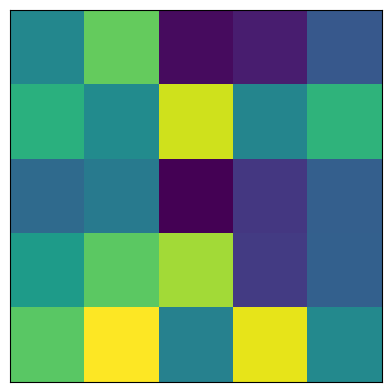

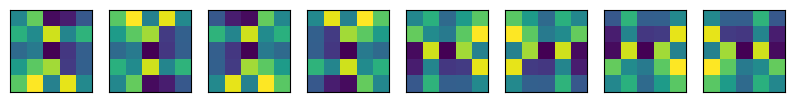

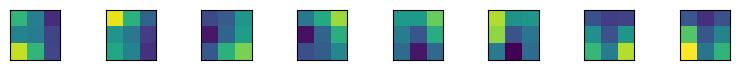

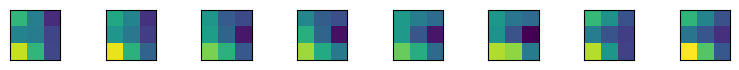

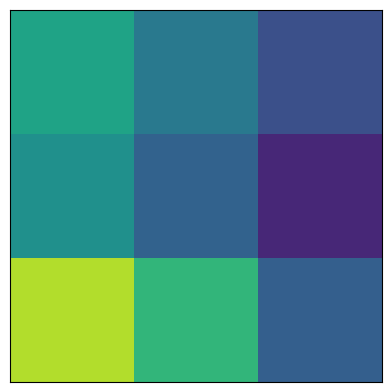

In [20]:
import sys; sys.path.append("..")
import model
import torch 
import matplotlib.pyplot as plt

torch.manual_seed(0)

N = 5

A = torch.sin(torch.linspace(0, 1, N**2, dtype=torch.double).view(1, N, N))
A += (torch.rand(A.shape)*2-1)*5
plt.matshow(A[0,...])
plt.xticks([])
plt.yticks([])
plt.savefig("input.pdf", format="pdf", bbox_inches="tight")
plt.show()

# builds symmetries
A_sym = model.apply_symmetries(A, nr_symmetries=8)

fig, ax = plt.subplots(1,8,figsize=(10, 3))
for i in range(8):
    ax[i].matshow(A_sym[0,i,...])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.savefig("input_symmetrized.pdf", format="pdf", bbox_inches="tight")
plt.show()

# padding
# A_sym = torch.cat((A_sym[:,:,:,-1:], A_sym, A_sym[:,:,:,:1]), dim=3)
# A_sym = torch.cat((A_sym[:,:,-1:,:], A_sym, A_sym[:,:,:1,:]), dim=2)

fig, ax = plt.subplots(1,8,figsize=(10, 3) ,gridspec_kw={"wspace": 0.9, "left":0.0, "right": 0.72}) # ,gridspec_kw={"wspace":1.2})
w = torch.tensor([[1/16, 1/8, 1/16],[1/8, 1/4, 1/8],[1/16, 1/8, 1/16]], dtype=torch.double).view(1,1,3,3)
w += (torch.rand(w.shape)*2-1)*.05
f_sym = torch.nn.functional.conv2d(A_sym.permute(1,0,2,3), weight=w, stride=[1,1])
f_sym = f_sym.permute(1,0,2,3)

for i in range(8):
    ax[i].matshow(f_sym[0,i,...], vmin=f_sym.min(), vmax=f_sym.max())
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.savefig("output_symmetrized.pdf", format="pdf", bbox_inches="tight")
plt.show()

f_hat = model.apply_symmetries(f_sym, nr_symmetries=8, inv=True)
fig, ax = plt.subplots(1,8,figsize=(10, 3) ,gridspec_kw={"wspace": 0.9, "left":0.0, "right": 0.72})
for i in range(8):
    ax[i].matshow(f_hat[0,i,...], vmin=f_sym.min(), vmax=f_sym.max())
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.savefig("output_reverted.pdf", format="pdf", bbox_inches="tight")
plt.show()

f_agg = f_hat.mean(dim=1).view(N-2,N-2)
plt.matshow(f_agg, vmin=f_sym.min(), vmax=f_sym.max())
plt.xticks([])
plt.yticks([])
plt.savefig("output.pdf", format="pdf", bbox_inches="tight")
plt.show()

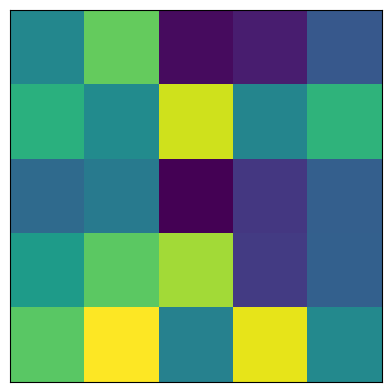

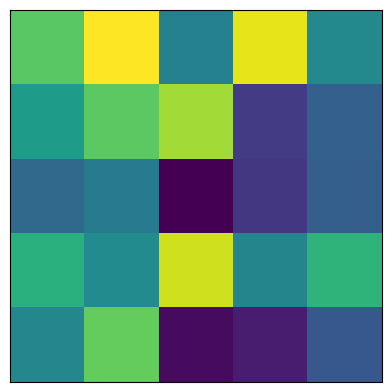

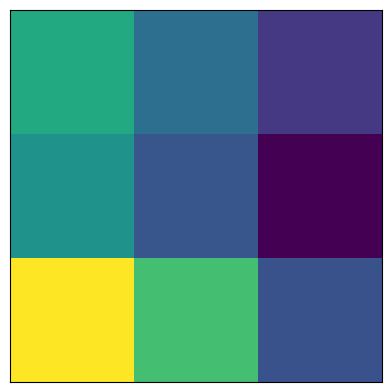

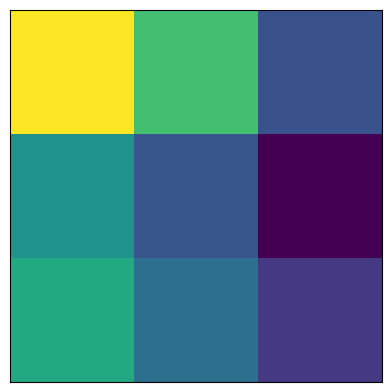

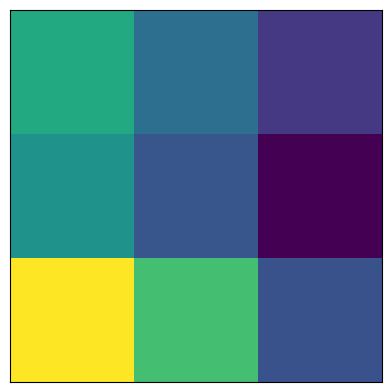

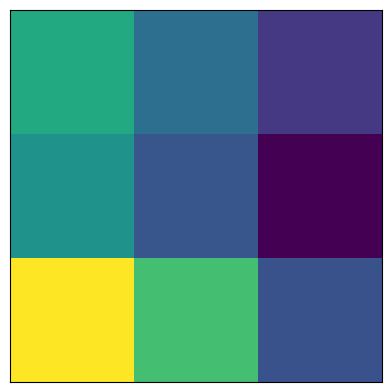

In [43]:
A_sym = model.apply_symmetries(A, nr_symmetries=2)
plt.matshow(A_sym[0,0,:,:])
plt.xticks([])
plt.yticks([])
plt.savefig("commutative_diagram/original.pdf")
plt.matshow(A_sym[0,1,:,:])
plt.xticks([])
plt.yticks([])
plt.savefig("commutative_diagram/transformed.pdf")

w = torch.tensor([[1/16, 1/8, 1/16],[1/8, 1/4, 1/8],[1/16, 1/8, 1/16]], dtype=torch.double).view(1,1,3,3)
f_sym = torch.nn.functional.conv2d(A_sym.permute(1,0,2,3), weight=w, stride=[1,1])
f_sym = f_sym.permute(1,0,2,3)
plt.matshow(f_sym[0,0,:,:])
plt.xticks([])
plt.yticks([])
plt.savefig("commutative_diagram/original_evolved.pdf")
plt.matshow(f_sym[0,1,:,:])
plt.xticks([])
plt.yticks([])
plt.savefig("commutative_diagram/transformed_evolved.pdf")

f = model.apply_symmetries(f_sym, nr_symmetries=2, inv=True)
plt.matshow(f[0,0,:,:])
plt.xticks([])
plt.yticks([])
plt.savefig("commutative_diagram/original_evolved_inv.pdf")
plt.matshow(f[0,1,:,:])
plt.xticks([])
plt.yticks([])
plt.savefig("commutative_diagram/transformed_evolved_inv.pdf")